In [ ]:
# !pip install binarytree
from binarytree import Node

# Huffman Encoding

1.   find the frequancy array for string and save it into dictionary {char<i>:freq<i>}i=0----->i=n
2.  sort it


1.   make a tree for each 2 nodes or chars save and sort it after each iteration
2.   List item



  2)
  3)<building tree step> (could sort it in this case reversed depend on how you want to build tree )
  4)left edges='0' and tight edges ='1' <encoding step>


Enter your string that you want to encode: hello i try to write to you with encrypted code to save our chat from spams
Huffman Codes:
 : 00
p: 01000
u: 01001
m: 01010
d: 01011
t: 011
o: 100
r: 1010
y: 10110
i: 10111
s: 11000
c: 11001
n: 110100
f: 1101010
v: 1101011
a: 11011
e: 1110
h: 11110
w: 111110
l: 111111


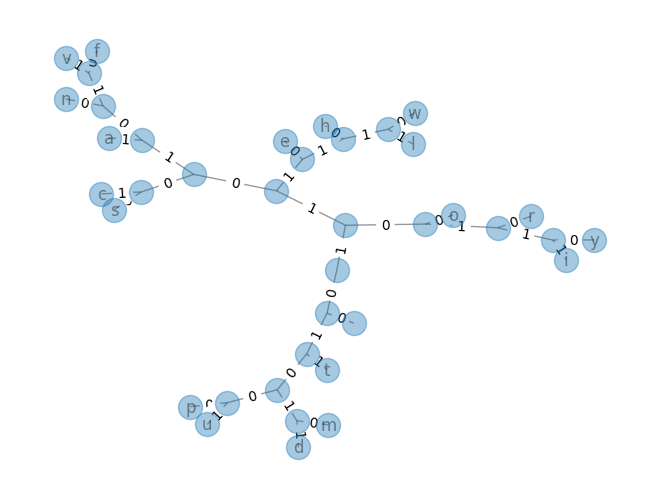

Encoded String:
11110111011111111111110000101110001110101011000011100001111101010101110111110000111000010110100010010011111010111011111100011101101001100110101011001000011111001011001100110001011111000011100001100011011110101111100010001001101000110011111011011011001101010101010001010001100001000110110101011000


In [ ]:
import networkx as nx # Import networkx library
import matplotlib.pyplot as plt # Import matplotlib library

string = input("Enter your string that you want to encode: ")
all_freq = {}

for i in string:
    if i in all_freq:
        all_freq[i] += 1
    else:
        all_freq[i] = 1

all_freq_sorted = dict(sorted(all_freq.items(), key=lambda item: item[1], reverse=True))

class Node_tree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

    def __str__(self):
        return str(self.left), str(self.right)

def build_huffman_code(node, bin_string=''):
    if type(node) == str:
        return {node: bin_string}

    l, r = node.children()
    d = {}
    d.update(build_huffman_code(l, bin_string + '0'))
    d.update(build_huffman_code(r, bin_string + '1'))
    return d

def build_huffman_tree(nodes):
    while len(nodes) > 1:
        (key1, f1) = nodes[-1]
        (key2, f2) = nodes[-2]
        nodes = nodes[:-2]
        node = Node_tree(key1, key2)
        nodes.append((node, f1 + f2))
        nodes = sorted(nodes, key=lambda x: x[1] ,  reverse=True)
    return nodes[0][0]

# Helper function to add edges recursively
def add_edges(node, graph, parent=None, label=''):
    if parent is not None:
        graph.add_edge(parent, node, label=label) # Add an edge with a label 0 or 1
    if type(node) == str: # Base case: leaf node
        return
    else: # Recursive case: internal node
        left, right = node.children()
        add_edges(left, graph, node, '0') # Go to the left child with label 0
        add_edges(right, graph, node, '1') # Go to the right child with label 1

# Helper function to get labels for nodes
def get_labels(node, labels):
    if type(node) == str: # Base case: leaf node
        labels[node] = node # Use the character as the label
    else: # Recursive case: internal node
        labels[node] = '' # Use an empty string as the label
        left, right = node.children()
        get_labels(left, labels) # Go to the left child
        get_labels(right, labels) # Go to the right child

# Helper function to get labels for edges
def get_edge_labels(node, edge_labels):
    if type(node) == str: # Base case: leaf node
        return
    else: # Recursive case: internal node
        left, right = node.children()
        edge_labels[(node, left)] = '0' # Label the edge to the left child as 0
        edge_labels[(node, right)] = '1' # Label the edge to the right child as 1
        get_edge_labels(left, edge_labels) # Go to the left child
        get_edge_labels(right, edge_labels) # Go to the right child

# Main function to draw the Huffman tree
def draw_tree(node):
    G = nx.Graph() # Create an empty graph
    add_edges(node, G) # Add edges from the root node
    labels = {} # Create an empty dictionary for labels
    get_labels(node, labels) # Get labels for nodes
    edge_labels = {} # Create an empty dictionary for edge labels
    get_edge_labels(node, edge_labels) # Get labels for edges
    pos = nx.spring_layout(G) # Get positions for nodes using a spring layout
    nx.draw(G, pos, labels=labels, alpha=0.4) # Draw the graph with labels and transparency
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels) # Draw the edge labels
    plt.show() # Show the plot

nodes = [(char, freq) for char, freq in all_freq_sorted.items()]
node = build_huffman_tree(nodes)
encoded = build_huffman_code(node)

print("Huffman Codes:")
for char, code in encoded.items():
    print(f"{char}: {code}")

draw_tree(node) # Draw the Huffman tree for the string
encoded_string = ''.join([encoded[char] for char in string]) # Join the codes for each character
print("Encoded String:")
print(encoded_string) # Print the encoded string


Enter your string that you want to encode: hello
Huffman Codes:
l: 0
h: 10
o: 110
e: 111


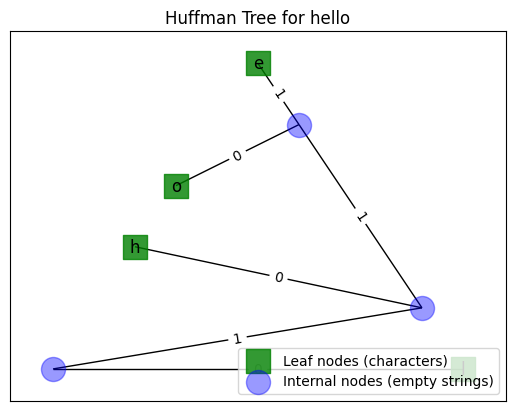

Encoded String:
1011100110
